# Dota2 Games Results

Выборка содержит информацию о завершенных играх 13 Августа 2016 года. Выборка основана на следующих параметрах:
1. Команда победившая игру (1 - radiant или -1 - dire)
2. Id Региона игры (Например 186 - Россия).
3. Режим Игры (1 - "All Pick", 2 - "Captains Mode", 3 - "Random Draft", 4 - "Single Draft", 5 - "All Random", 6 - "?? INTRO/DEATH ??", 7 - "The Diretide", 8 - "Reverse Captains Mode", 9 - "Greeviling")
4. Тип лобби (0 - "Public matchmaking", 1 - "Practice", 2 - "Tournament", 3 - "Tutorial", 4 - "Co-op with bots", 5 - "Team match", 6 - "Solo Queue", 7 - "Ranked", 8 - "Solo Mid 1vs1")
5. - end. Каждый элемент соответствует id героя игры. Соответсвенно 5 - Герой с id 1 (Anti-Mage) 117 герой с id 113 (Arc Warden) значение в ячейке 1 или -1 означает что данный герой был "пикнут" соответствующей командой.

Примечание: т.к все данные в наборе это просто ID вычисление многих признаков бесполезно, но сделано для примера.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

In [3]:
url = 'sources/dota2Test.csv'
data = pd.read_csv(url, sep = ',', engine='python', header=None)

In [4]:
type(data)

pandas.core.frame.DataFrame

Прочитаем список персонажей из файла чтобы сгенерировать заголовок

In [5]:
with open("sources/heroes.json") as f:
    json_data = json.load(f)
heroes = ["NOaH"] * (len(json_data["heroes"])+1)
for a in json_data["heroes"]:
    heroes[a["id"] - 1] = a["name"]

Сгенерируем "Читабельный" заголовок

In [6]:
header = ["Team_Won", "Cluster_ID", "Game_Mode", "Game_Lobby"]
header.extend(heroes)

In [7]:
data.columns = header

In [8]:
data

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
6,1,152,2,2,0,0,0,0,0,-1,...,0,1,0,0,0,0,0,0,0,0
7,-1,153,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,223,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1,153,2,2,0,0,0,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


Отображение данных стандартными средствами python

In [9]:
print(data)

       Team_Won  Cluster_ID  Game_Mode  Game_Lobby  antimage  axe  bane  \
0            -1         223          8           2         0   -1     0   
1             1         227          8           2         0    0     0   
2            -1         136          2           2         1    0     0   
3             1         227          2           2        -1    0     0   
4             1         184          2           3         0    0     0   
5             1         231          2           2         0    0     0   
6             1         152          2           2         0    0     0   
7            -1         153          2           2         1    0     0   
8            -1         223          8           2         0    0     0   
9            -1         153          2           2         0    0     0   
10           -1         133          9           2         0    0     0   
11           -1         124          2           3         0    0     0   
12            1         1

Режимы отображения

In [10]:
data.head()

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.tail()

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10293,-1,184,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


Вывод размера данных и списка столбцов

In [12]:
print(data.shape)
print(data.columns)

(10294, 117)
Index(['Team_Won', 'Cluster_ID', 'Game_Mode', 'Game_Lobby', 'antimage', 'axe',
       'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger',
       ...
       'legion_commander', 'techies', 'ember_spirit', 'earth_spirit',
       'abyssal_underlord', 'terrorblade', 'phoenix', 'oracle',
       'winter_wyvern', 'arc_warden'],
      dtype='object', length=117)


In [13]:
data.index

RangeIndex(start=0, stop=10294, step=1)

Способы обращения к данным

In [14]:
data.at[3, 'Game_Mode']

2

In [15]:
data['Cluster_ID']

0        223
1        227
2        136
3        227
4        184
5        231
6        152
7        153
8        223
9        153
10       133
11       124
12       154
13       151
14       223
15       154
16       227
17       224
18       225
19       187
20       225
21       152
22       231
23       156
24       227
25       137
26       131
27       136
28       155
29       227
        ... 
10264    188
10265    185
10266    204
10267    227
10268    225
10269    187
10270    151
10271    227
10272    227
10273    152
10274    134
10275    151
10276    227
10277    152
10278    156
10279    156
10280    188
10281    225
10282    156
10283    187
10284    152
10285    152
10286    227
10287    155
10288    155
10289    121
10290    154
10291    122
10292    152
10293    184
Name: Cluster_ID, Length: 10294, dtype: int64

In [16]:
data['Team_Won'][5]

1

In [17]:
data['Game_Mode'].dtype.name

'int64'

In [18]:
type(data['Game_Mode'][3])

numpy.int64

In [19]:
type(data['Game_Mode'])

pandas.core.series.Series

In [20]:
data[['Game_Mode', 'Game_Lobby']].head()

,Game_Mode,Game_Lobby
0,8,2
1,8,2
2,2,2
3,2,2
4,2,3


Основные характеристики выборки по каждому из параметров.

In [21]:
data.describe()

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,...,10294.000000,10294.000000,10294.000000,10294.000000,10294.0,10294.00000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554,0.002914,-0.000194,0.000000,-0.005926,0.000680,...,0.001749,0.003983,-0.000680,-0.000874,0.0,0.00068,0.002720,-0.000874,-0.000389,0.000486
std,0.997667,35.687654,2.654345,0.488446,0.398186,0.465659,0.172421,0.347368,0.332892,0.479746,...,0.532985,0.204590,0.285161,0.146527,0.0,0.22018,0.209537,0.169864,0.181212,0.133337
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


Матрица ковариаций (На выборке из 4х героев)

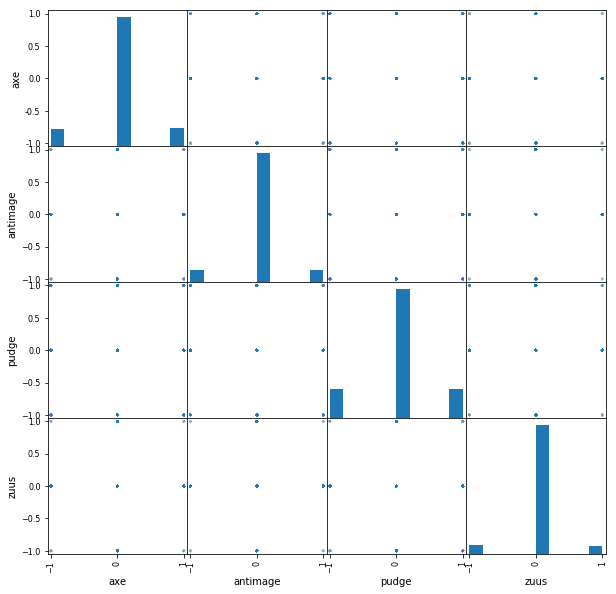

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['axe', 'antimage', 'pudge', 'zuus']], alpha = .01, figsize = (10, 10))
pass

Корреляция параметров

In [23]:
data.corr()

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
Team_Won,1.000000,0.009597,-0.001256,1.198425e-02,-0.026143,0.015461,-2.181230e-03,6.728122e-03,0.036042,1.025417e-02,...,-0.000227,-0.017053,-0.047303,-3.481082e-02,NaN,0.002882,0.014904,-0.032321,-0.031020,-0.014128
Cluster_ID,0.009597,1.000000,0.171936,9.067711e-03,-0.013204,0.001587,-6.852859e-03,2.139503e-03,-0.007106,-1.251736e-02,...,-0.003625,-0.004276,0.004448,1.242673e-02,NaN,-0.006811,0.008230,0.015383,-0.016721,-0.012187
Game_Mode,-0.001256,0.171936,1.000000,-1.670059e-01,-0.002624,0.005484,-2.402525e-03,-9.693904e-03,0.020760,-2.623607e-03,...,-0.017109,0.020576,0.004157,-1.422068e-02,NaN,0.002595,0.009511,0.006479,0.002901,0.000355
Game_Lobby,0.011984,0.009068,-0.167006,1.000000e+00,0.019090,-0.004552,1.704680e-02,-2.863003e-03,0.000420,-3.615335e-03,...,0.001495,0.003955,-0.002288,-6.825498e-04,NaN,0.014707,-0.003683,-0.013469,-0.010368,-0.011849
antimage,-0.026143,-0.013204,-0.002624,1.909039e-02,1.000000,-0.010979,-2.834571e-03,-3.301264e-02,0.016055,-3.966388e-02,...,-0.031116,0.008424,-0.018833,6.637329e-03,NaN,-0.006637,0.001215,-0.010075,0.001338,-0.012795
axe,0.015461,0.001587,0.005484,-4.552189e-03,-0.010979,1.000000,1.217096e-03,-1.741801e-02,-0.005529,-2.088359e-02,...,-0.037600,-0.021537,-0.007302,-1.135368e-02,NaN,-0.018971,-0.001077,-0.009794,-0.004592,-0.015670
bane,-0.002181,-0.006853,-0.002403,1.704680e-02,-0.002835,0.001217,1.000000e+00,8.110521e-03,-0.010176,-1.761608e-02,...,0.008461,-0.005486,-0.007907,-3.852209e-03,NaN,-0.002556,0.002704,-0.006640,0.003107,-0.021125
bloodseeker,0.006728,0.002140,-0.009694,-2.863003e-03,-0.033013,-0.017418,8.110521e-03,1.000000e+00,-0.009242,-1.457462e-02,...,-0.027812,-0.031442,0.000981,3.817515e-03,NaN,-0.024135,-0.005339,0.004940,-0.001543,-0.004195
crystal_maiden,0.036042,-0.007106,0.020760,4.201197e-04,0.016055,-0.005529,-1.017592e-02,-9.241828e-03,1.000000,-2.430823e-02,...,-0.008703,-0.002506,-0.012324,1.885538e-03,NaN,-0.002596,-0.023447,-0.017273,-0.017754,-0.008690
drow_ranger,0.010254,-0.012517,-0.002624,-3.615335e-03,-0.039664,-0.020884,-1.761608e-02,-1.457462e-02,-0.024308,1.000000e+00,...,-0.036100,-0.016855,-0.019171,-1.795843e-02,NaN,-0.021159,-0.005817,0.007160,0.003356,-0.007599


График показывает Соотношение Типа матчмейкинга от Игрового режима

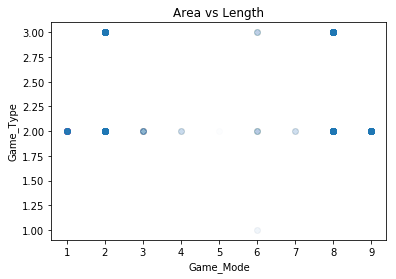

In [24]:
plt.plot(data['Game_Mode'], data['Game_Lobby'], 'o', alpha = 0.01)
plt.xlabel('Game_Mode')
plt.ylabel('Game_Type')
plt.title('Area vs Length')

Был ли "пикнут" герой стороной dire в игре

In [25]:
data['axe'] == -1

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16        True
17       False
18       False
19       False
20       False
21        True
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10264    False
10265    False
10266    False
10267    False
10268    False
10269    False
10270    False
10271    False
10272     True
10273    False
10274    False
10275    False
10276    False
10277    False
10278    False
10279    False
10280     True
10281    False
10282    False
10283    False
10284    False
10285    False
10286    False
10287    False
10288    False
10289    False
10290    False
10291    False
10292    False
10293    False
Name: axe, Length: 10294, dtype: bool

Диаграмма рассеяния переменных Региона игры и Режима игры для 2 и 3го типа лобби

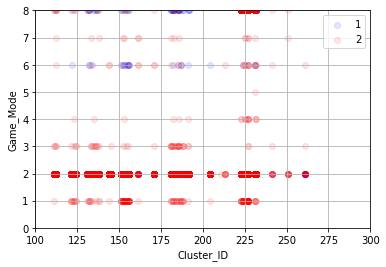

In [26]:
plt.scatter(data[data['Game_Lobby'] == 3]['Cluster_ID'],
            data[data['Game_Lobby'] == 3]['Game_Mode'],
            alpha = 0.1,
            label = '1',
            color = 'b')
plt.scatter(data[data['Game_Lobby'] == 2]['Cluster_ID'],
            data[data['Game_Lobby'] == 2]['Game_Mode'],
            alpha = 0.1,
            label = '2',
            color = 'r')
plt.xlabel('Cluster_ID')
plt.xlim(100, 300)
plt.ylabel('Game_Mode')
plt.ylim(0, 8)
plt.legend()
plt.grid()

Параметры стоблцов с типом int

In [27]:
data.describe(include = ['int64'])

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,...,10294.000000,10294.000000,10294.000000,10294.000000,10294.0,10294.00000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554,0.002914,-0.000194,0.000000,-0.005926,0.000680,...,0.001749,0.003983,-0.000680,-0.000874,0.0,0.00068,0.002720,-0.000874,-0.000389,0.000486
std,0.997667,35.687654,2.654345,0.488446,0.398186,0.465659,0.172421,0.347368,0.332892,0.479746,...,0.532985,0.204590,0.285161,0.146527,0.0,0.22018,0.209537,0.169864,0.181212,0.133337
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


Параметры столбцов с любым типом

In [28]:
data.describe(include = 'all')

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,...,10294.000000,10294.000000,10294.000000,10294.000000,10294.0,10294.00000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554,0.002914,-0.000194,0.000000,-0.005926,0.000680,...,0.001749,0.003983,-0.000680,-0.000874,0.0,0.00068,0.002720,-0.000874,-0.000389,0.000486
std,0.997667,35.687654,2.654345,0.488446,0.398186,0.465659,0.172421,0.347368,0.332892,0.479746,...,0.532985,0.204590,0.285161,0.146527,0.0,0.22018,0.209537,0.169864,0.181212,0.133337
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


Уникальные значения в столбце

In [29]:
data['Game_Mode'].unique()

array([8, 2, 9, 1, 6, 7, 4, 3, 5], dtype=int64)

Результат первого матча для каждого режима игры

In [30]:
for game_type in data['Game_Mode'].unique():
    print("Режим игры {}: Победила команда : {}"
          .format(game_type, "dire" if data["Team_Won"][data['Game_Mode']==game_type].iloc[0] == -1 else "radiant"))

Режим игры 8: Победила команда : dire
Режим игры 2: Победила команда : dire
Режим игры 9: Победила команда : dire
Режим игры 1: Победила команда : dire
Режим игры 6: Победила команда : dire
Режим игры 7: Победила команда : radiant
Режим игры 4: Победила команда : radiant
Режим игры 3: Победила команда : dire
Режим игры 5: Победила команда : dire


## Задача

Удалим столбец с героем id которого не было в heroes.json

In [31]:
data.drop(['NOaH'], axis = 1)

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
6,1,152,2,2,0,0,0,0,0,-1,...,0,1,0,0,0,0,0,0,0,0
7,-1,153,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,223,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1,153,2,2,0,0,0,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


## Разбиваем данные на группы
Три группы: 1: столбец со значениями [-1,1], 2 : [-1, 0, 1], 3 : все остальные значения

In [32]:
def is_group(group, _data):
    for val in _data:
        if val not in group:
            return False
    return True
group1 = [c for c in data.columns if is_group([-1, 1], data[c])]
group2 = [c for c in data.columns if is_group([-1, 0, 1], data[c]) and c not in group1]
group3 = [c for c in data.columns if not is_group([-1, 0, 1], data[c])]
print(group1)
print(group2)
print(group3)

['Team_Won']
['antimage', 'axe', 'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger', 'earthshaker', 'juggernaut', 'mirana', 'morphling', 'nevermore', 'phantom_lancer', 'puck', 'pudge', 'razor', 'sand_king', 'storm_spirit', 'sven', 'tiny', 'vengefulspirit', 'windrunner', 'zuus', 'kunkka', 'NOaH', 'lina', 'lion', 'shadow_shaman', 'slardar', 'tidehunter', 'witch_doctor', 'lich', 'riki', 'enigma', 'tinker', 'sniper', 'necrolyte', 'warlock', 'beastmaster', 'queenofpain', 'venomancer', 'faceless_void', 'skeleton_king', 'death_prophet', 'phantom_assassin', 'pugna', 'templar_assassin', 'viper', 'luna', 'dragon_knight', 'dazzle', 'rattletrap', 'leshrac', 'furion', 'life_stealer', 'dark_seer', 'clinkz', 'omniknight', 'enchantress', 'huskar', 'night_stalker', 'broodmother', 'bounty_hunter', 'weaver', 'jakiro', 'batrider', 'chen', 'spectre', 'ancient_apparition', 'doom_bringer', 'ursa', 'spirit_breaker', 'gyrocopter', 'alchemist', 'invoker', 'silencer', 'obsidian_destroyer', 'lycan', 'brewmast

In [33]:
for c in group3:
    print(c, data[c].unique())

Cluster_ID [223 227 136 184 231 152 153 133 124 154 151 224 225 187 156 137 131 155
 204 144 138 182 191 251 132 188 232 135 186 112 185 181 171 122 145 111
 261 123 183 134 192 161 121 241 213 211]
Game_Mode [8 2 9 1 6 7 4 3 5]
Game_Lobby [2 3 1]


In [34]:
data.median(axis = 0)

Team_Won                 1.0
Cluster_ID             156.0
Game_Mode                2.0
Game_Lobby               2.0
antimage                 0.0
axe                      0.0
bane                     0.0
bloodseeker              0.0
crystal_maiden           0.0
drow_ranger              0.0
earthshaker              0.0
juggernaut               0.0
mirana                   0.0
morphling                0.0
nevermore                0.0
phantom_lancer           0.0
puck                     0.0
pudge                    0.0
razor                    0.0
sand_king                0.0
storm_spirit             0.0
sven                     0.0
tiny                     0.0
vengefulspirit           0.0
windrunner               0.0
zuus                     0.0
kunkka                   0.0
NOaH                     0.0
lina                     0.0
lion                     0.0
                       ...  
ogre_magi                0.0
undying                  0.0
rubick                   0.0
disruptor     

In [35]:
data = data.fillna(data.median(axis = 0), axis = 0)

Нет пропущенных данных

In [36]:
data[group3].count(axis = 0)

Cluster_ID    10294
Game_Mode     10294
Game_Lobby    10294
dtype: int64

In [37]:
data[group1].count(axis = 0)

Team_Won    10294
dtype: int64

In [38]:
data[group2].count(axis = 0)

antimage               10294
axe                    10294
bane                   10294
bloodseeker            10294
crystal_maiden         10294
drow_ranger            10294
earthshaker            10294
juggernaut             10294
mirana                 10294
morphling              10294
nevermore              10294
phantom_lancer         10294
puck                   10294
pudge                  10294
razor                  10294
sand_king              10294
storm_spirit           10294
sven                   10294
tiny                   10294
vengefulspirit         10294
windrunner             10294
zuus                   10294
kunkka                 10294
NOaH                   10294
lina                   10294
lion                   10294
shadow_shaman          10294
slardar                10294
tidehunter             10294
witch_doctor           10294
                       ...  
ogre_magi              10294
undying                10294
rubick                 10294
disruptor     

Характеристики столбца

In [39]:
data['Game_Mode'].describe()

count    10294.000000
mean         3.341170
std          2.654345
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: Game_Mode, dtype: float64

In [40]:
type(data['Game_Mode'].describe())

pandas.core.series.Series

In [41]:
data['Game_Mode'] = data['Game_Mode'].fillna(4)

In [42]:
data.describe(include = ['int64'])

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,...,10294.000000,10294.000000,10294.000000,10294.000000,10294.0,10294.00000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554,0.002914,-0.000194,0.000000,-0.005926,0.000680,...,0.001749,0.003983,-0.000680,-0.000874,0.0,0.00068,0.002720,-0.000874,-0.000389,0.000486
std,0.997667,35.687654,2.654345,0.488446,0.398186,0.465659,0.172421,0.347368,0.332892,0.479746,...,0.532985,0.204590,0.285161,0.146527,0.0,0.22018,0.209537,0.169864,0.181212,0.133337
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


In [43]:
data_describe = data.describe(include = ['int64'])
for c in group3:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [44]:
data.describe(include = ['int64'])

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000,...,10294.000000,10294.000000,10294.000000,10294.000000,10294.0,10294.00000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554,0.002914,-0.000194,0.000000,-0.005926,0.000680,...,0.001749,0.003983,-0.000680,-0.000874,0.0,0.00068,0.002720,-0.000874,-0.000389,0.000486
std,0.997667,35.687654,2.654345,0.488446,0.398186,0.465659,0.172421,0.347368,0.332892,0.479746,...,0.532985,0.204590,0.285161,0.146527,0.0,0.22018,0.209537,0.169864,0.181212,0.133337
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


## Векторизация
Применим векторизацию к категориальному признаку: Победа команды (Team Won)

In [45]:
data_group1 = pd.get_dummies(data[group1])
print(data_group1.columns)

Index(['Team_Won'], dtype='object')


## Нормализация признаков из третьей группы

In [46]:
data_group3 = data[group3]
data_group3.describe()

,Cluster_ID,Game_Mode,Game_Lobby
count,10294.000000,10294.000000,10294.000000
mean,175.984263,3.341170,2.388576
std,35.687654,2.654345,0.488446
min,111.000000,1.000000,1.000000
25%,152.000000,2.000000,2.000000
50%,156.000000,2.000000,2.000000
75%,223.000000,2.000000,3.000000
max,261.000000,9.000000,3.000000


In [47]:
data_group3 = (data_group3 - data_group3.mean(axis = 0))/data_group3.std(axis = 0)

In [48]:
data_group3.describe()

,Cluster_ID,Game_Mode,Game_Lobby
count,1.029400e+04,1.029400e+04,1.029400e+04
mean,2.866153e-18,4.234033e-16,5.702754e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.820917e+00,-8.820141e-01,-2.842845e+00
25%,-6.720605e-01,-5.052733e-01,-7.955353e-01
50%,-5.599769e-01,-5.052733e-01,-7.955353e-01
75%,1.317423e+00,-5.052733e-01,1.251775e+00
max,2.382217e+00,2.131912e+00,1.251775e+00


## Соединяем в одну таблицу

In [49]:
data = pd.concat((data_group1, data_group3), axis = 1)

In [50]:
data.describe()

,Team_Won,Cluster_ID,Game_Mode,Game_Lobby
count,10294.000000,1.029400e+04,1.029400e+04,1.029400e+04
mean,0.068972,2.866153e-18,4.234033e-16,5.702754e-16
std,0.997667,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.000000,-1.820917e+00,-8.820141e-01,-2.842845e+00
25%,-1.000000,-6.720605e-01,-5.052733e-01,-7.955353e-01
50%,1.000000,-5.599769e-01,-5.052733e-01,-7.955353e-01
75%,1.000000,1.317423e+00,-5.052733e-01,1.251775e+00
max,1.000000,2.382217e+00,2.131912e+00,1.251775e+00


## X и y

In [51]:
X = data.drop(('Team_Won'), axis = 1)
y = data['Team_Won']
feature_names = X.columns

In [52]:
type(feature_names)

pandas.core.indexes.base.Index

In [53]:
feature_names

Index(['Cluster_ID', 'Game_Mode', 'Game_Lobby'], dtype='object')

In [54]:
print(X.shape)
print(y.shape)

(10294, 3)
(10294,)


In [55]:
type(X)

pandas.core.frame.DataFrame

In [56]:
type(y)

pandas.core.series.Series

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7205 3089


# $k$NN

Объявляем классификатор с параметром $k$ = 10. Проводим обучение модели на обучающей выборке X_train, y_train

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [59]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Применяем метод predict. Считаем среднюю ошибку

In [60]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.476335877863 0.503722887666


Ошибка вторым способом

In [61]:
err_test = 1 - knn.score(X_test, y_test)

In [62]:
err_test

0.50372288766591122

С помощью метода confusion matrix вычислим точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j

In [63]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[756 713]
 [843 777]]


Подберем оптимальное(по величине ошибки) значение параметра $k$.

In [64]:
from sklearn.model_selection import GridSearchCV
nnb = range(1, 160, 3)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.470784177654 151


Проведем классификацию и посчитаем ошибки при данном параметре  k

In [65]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.453990284525 0.481709291033


Результат вполне предсказуемый т.к врятли победившая сторона зависит от типа лобби или сервера игры.